# Gompertz Curve Fitting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [12]:
Y = [8.7,19.8,24.7,32.5,42.2,58.2,60.6,100.0,100.1,131.5,117.9,
    157.3,152.0,211.3,194.8,252.1,297.6,267.1,247.1,359.8,388.7,
    452.4,468.8,494.2,539.1,602.4,666.5,729.3,846.7,782.7,955.5,
    865.4,845.0]
t = list(range(1,34))      
y = list(np.log10(Y))
dict1 =  {
    "Year":list(range(1920,1953)) ,
    "Consumption":Y ,
    "t":t,
    "y = log10Y":y  
        }
pd.DataFrame(dict1)  

,Year,Consumption,t,y = log10Y
0,1920,8.7,1,0.939519
1,1921,19.8,2,1.296665
2,1922,24.7,3,1.392697
3,1923,32.5,4,1.511883
4,1924,42.2,5,1.625312
5,1925,58.2,6,1.764923
6,1926,60.6,7,1.782473
7,1927,100.0,8,2.000000
8,1928,100.1,9,2.000434
9,1929,131.5,10,2.118926


In [13]:
s1 = sum(y[0:11])
s2 = sum(y[11:22])
s3 = sum(y[22:33])
m=11
b = ((s2-s3)/(s1-s2))**(1/m)
A = ((s1-s2)*(1-b))/(b*(1-b**m)**2)
a = 10**(A)
K = (s1*s3-s2**2)/(m*(s1-2*s2+s3))
k = 10**K
print(" k = ", k , "\n a = ", a ,"\n b = ", b)

 k =  2940.1630000300443 
 a =  0.0044932206393056996 
 b =  0.9536941790864304


Gompertz Curve is   
$Y = k{a^{b^t}}$

In [14]:
# Gompertz Curve Function
def trend(t,k,a,b):
    return k*(a**(b**t))

print(" Trend in 1930: ", trend(11,k,a,b),
"\n Trend in 1940: ", trend(21,k,a,b),
"\n Trend in 1960: ",trend(41,k,a,b))

 Trend in 1930:  118.82522397723118 
 Trend in 1940:  399.0586930323569 
 Trend in 1960:  1356.2762584496252


Text(0, 0.5, 'Y(t)')

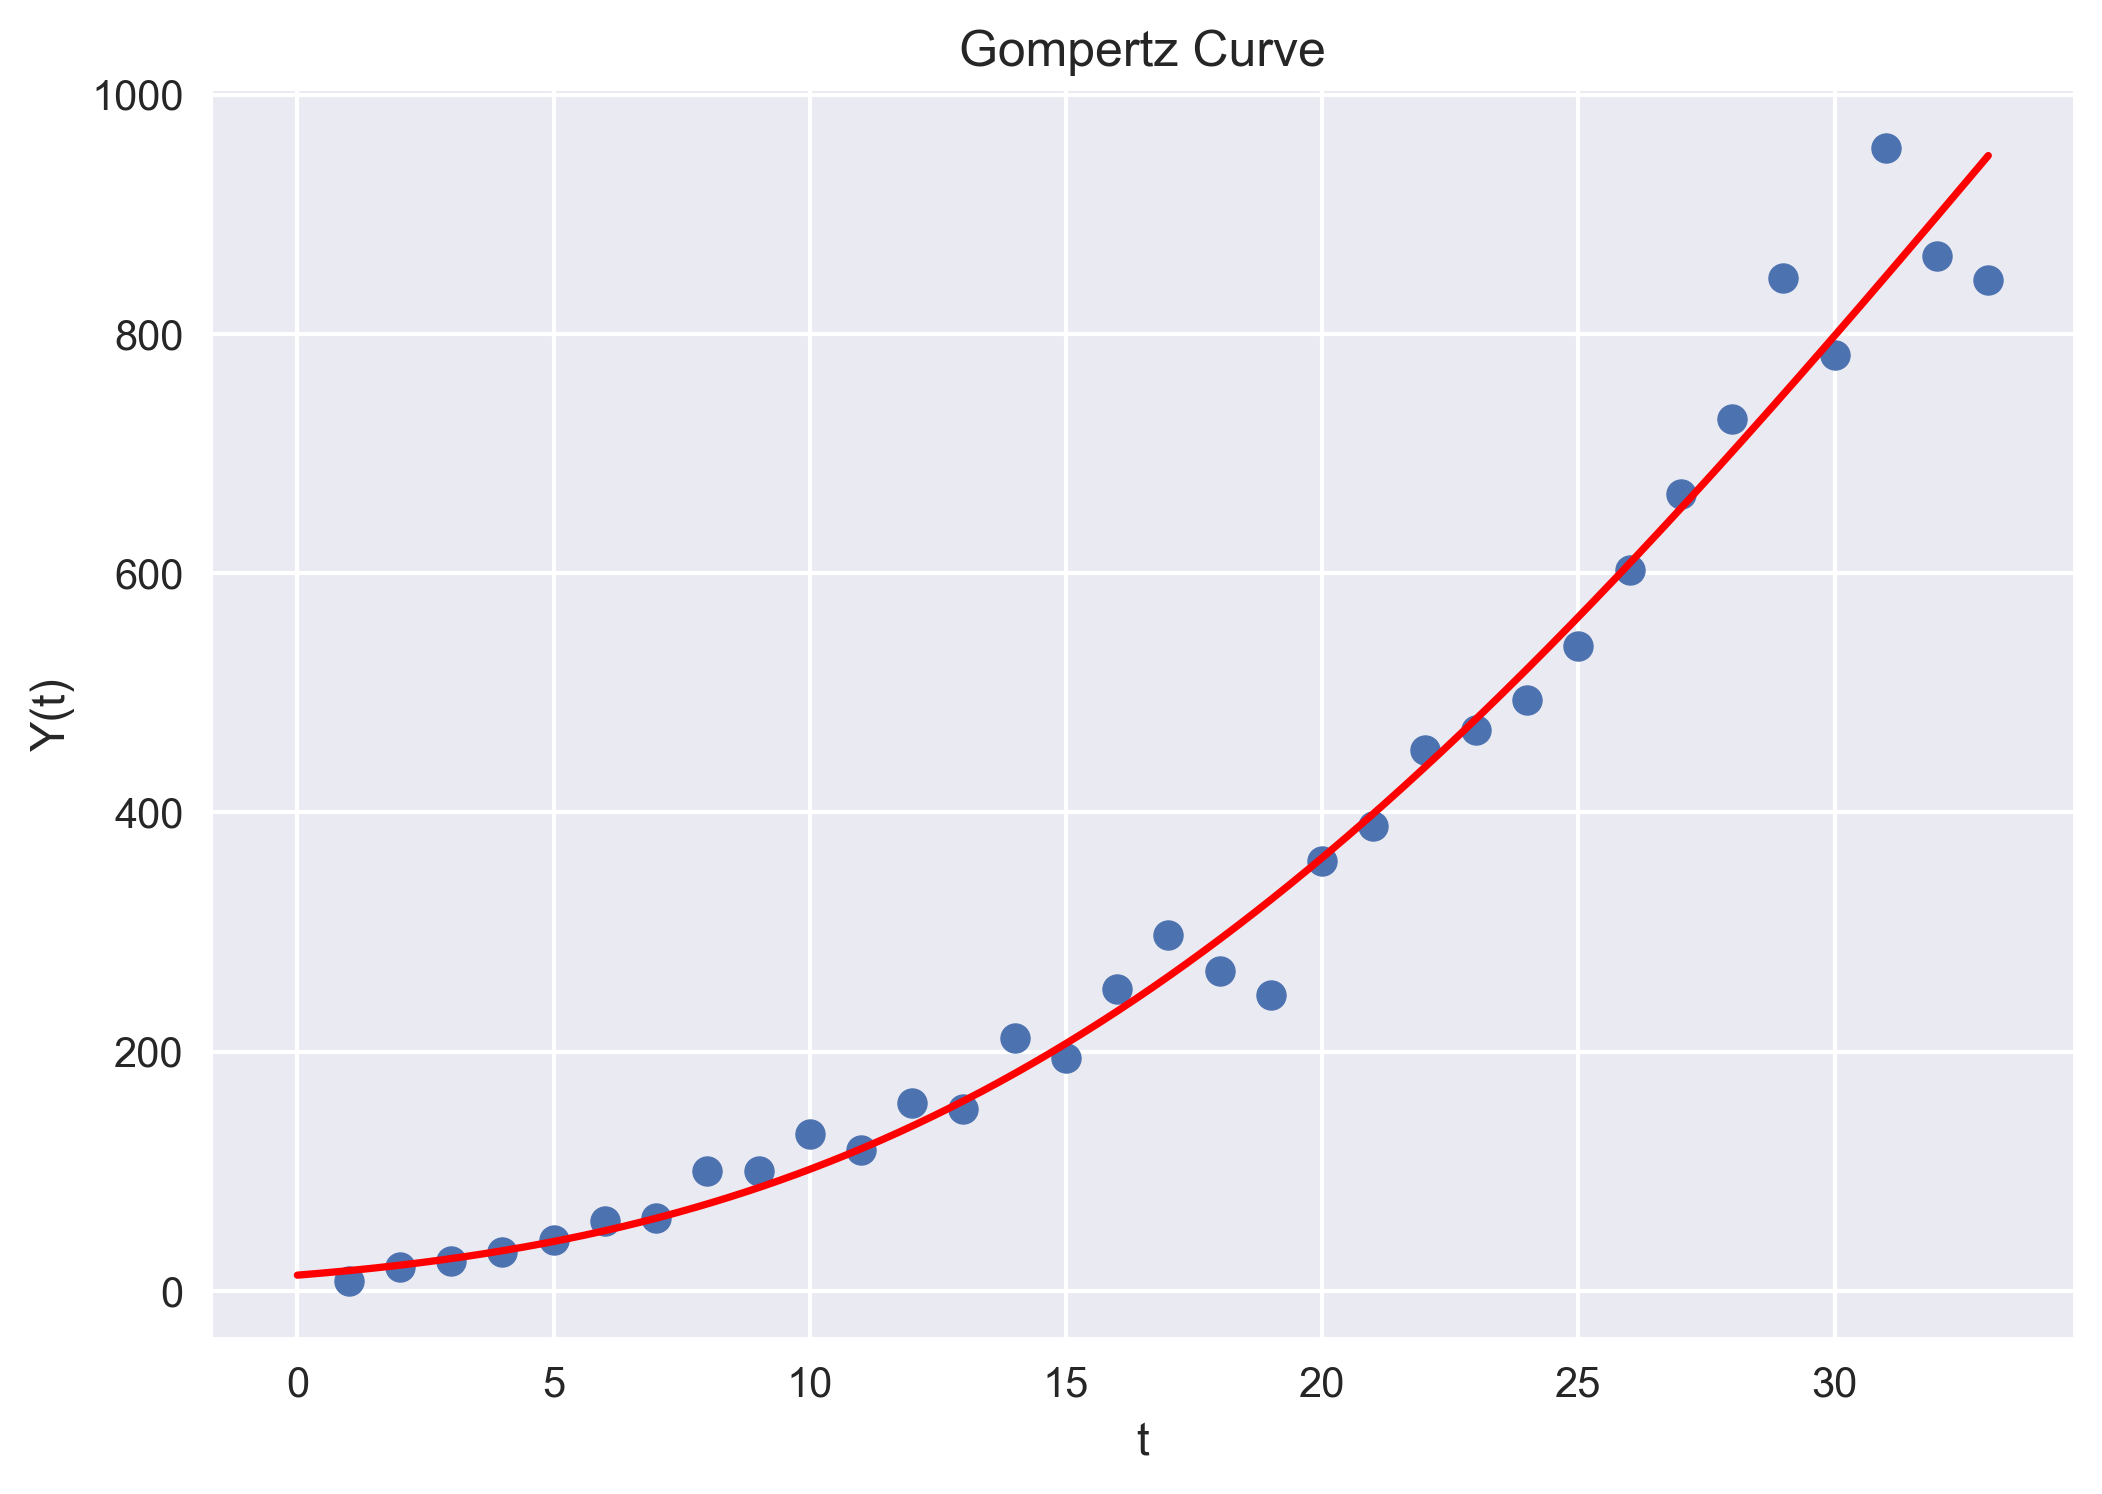

In [15]:
x = np.linspace(0,33,num = 1000)
plt.figure(dpi=300)
plt.style.use('seaborn')
plt.plot(x,trend(x,k,a,b),'r')
plt.scatter(t,Y)
plt.title("Gompertz Curve")
plt.xlabel("t")
plt.ylabel("Y(t)")